In [1]:
import graphviz as gv #Graficos
import numpy as np
import heapq as hq
import pandas as pd #Leer CSV
import matplotlib.pyplot as plt # Gragicos final
import math as math #Operaciones matematicas

def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

Vamos a analizar el código del Algoritmo Floyd Warshall para aproximar los tiempos que tendría para hallar la ruta mas corta de los almacenes hacia los puntos de entrega en el trabajo final. -> O(n^2 log n)

In [23]:
# O(n^2 log n), pues los 'for' no dependen uno del otro
def floydWarshall(G, places):
  n = len(G) # 2
  min_path = [] # 1

  cost = [[float('inf')]*n for _ in range(n)] # crea matriz, n  es numero de filas y por cada uno hay un arreglo con n elementos infinitos
  path = [[-1]*n for _ in range(n)] # lo mismo, pero con -1 en vez de infinitos


  for u in range(n): # armas la matriz inicial, 0 si fila == columna, el peso si hay llegada directa a ese nodo, y inf si no hay # n
    cost[u][u] = 0 # 2 + 2
    for v, w in G[u]: # n*n
      cost[u][v] = w # 2
      path[u][v] = u # 2

  for k in range(n): #COLUMNA # n
    for i in range(n): #FILA # n * n
      if i == k: continue # 1
      for j in range(n): # columna iterativa # n * n * log n
        if i == j or j == k: continue # 2
        f = cost[i][k] + cost[k][j] # 4
        if f < cost[i][j]: # si el costo es menor # 2
          cost[i][j] = f   # lo remplazas # 2
          path[i][j] = path[k][j] # agaregas el ultimo camino # 3
  
  for i, v in enumerate(places): # n
    if v == 2: # si es un almacen # 1
      min_path.append(path[i]) # agregar a la lista

  return min_path, cost

In [26]:
# Matriz de prueba y locales de prueba
matriz = [[[0,0],[1,2],[2,1], [4, 3]],
          [[1, 0], [3, 4]],
          [[1, 1], [2, 0], [4, 1]],
          [[0, 1], [2, 3], [3, 0], [4, 5]],
          [[4, 0]]]

# 2 = almacen, 1 = punto de entrega
locals = [0, 1, 1, 2, 0]

El camino que retorna el algoritmo es la ruta que sigue aquellos nodos que son un almacén

In [36]:
p, c = floydWarshall(matriz, locals)
print(p)
print(c)

[[3, 0, 0, 3, 2]]
[[0, 2, 1, 6, 2], [5, 0, 6, 4, 7], [6, 1, 0, 5, 1], [1, 3, 2, 0, 3], [inf, inf, inf, inf, 0]]


![fw_inicial](https://i.postimg.cc/MTxQCSGH/fw-inicio.png)
![fw_final](https://i.postimg.cc/KcfPyRB2/fw-fin.png)


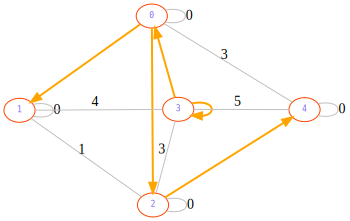

In [31]:
adjlShow(matriz, weighted=c, path=p[0])